This notebook uncludes the investigation on two models: (1) Random Forest and (2) Neutral Network model, with different combination of features selected


In [1]:
# import the necessnary libs
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import urllib
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [2]:
### Load data
fdf = pd.read_csv("full_data.csv")

In [3]:
df_train, df_test = train_test_split(fdf,test_size=0.2)

pos_train = df_train["Pla."]
x_train = df_train.iloc[:,6:].values
y3_train = df_train["top3"]
y1_train = df_train["top1"]

pos_test = df_test["Pla."]
x_test = df_test.iloc[:,6:].values
y3_test = df_test["top3"]
y1_test = df_test["top1"]

feature=df_train.columns[6:].values

## Random Forest

### 1. naive model

A naive random forest model, with all the features included

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf_clf.fit(x_train, y1_train)
y1_pred=rf_clf.predict(x_test)
print('Accuracy for top 1:', round(accuracy_score(y1_test, y1_pred), 4))

rf_clf.fit(x_train, y3_train)
y3_pred=rf_clf.predict(x_test)
print('Accuracy for top 3:', round(accuracy_score(y3_test, y3_pred), 4))

Accuracy for top 1: 0.8936
Accuracy for top 3: 0.7435


### 2. Model consider variable importance: classifier on 'top3'

In [5]:
from sklearn.inspection import permutation_importance


In [6]:
# Define a permutation importance object
perm = permutation_importance(rf_clf, x_train, y3_train)
sorted_idx = perm.importances_mean.argsort()[::-1]  # Reverse the sorting order to have highest weights first

print("Weight\t\tFeature")
for idx in sorted_idx:
    print(f"{perm.importances_mean[idx]:.4f} ± {perm.importances_std[idx]:.4f}\t{feature[idx]}")



Weight		Feature
0.1852 ± 0.0032	Win Odds
0.0825 ± 0.0011	Season Stakes*
0.0550 ± 0.0007	Dr.
0.0398 ± 0.0008	Declar. Horse Wt.
0.0384 ± 0.0007	Act. Wt.
0.0290 ± 0.0008	NoofGear
0.0223 ± 0.0009	Rtg.
0.0185 ± 0.0012	Age
0.0109 ± 0.0006	Dist.
0.0060 ± 0.0006	Country of Origin_AUS
0.0031 ± 0.0002	Course_ "B"
0.0029 ± 0.0003	RC_ST 
0.0028 ± 0.0003	Course_ "C"
0.0026 ± 0.0002	Course_ "A"
0.0025 ± 0.0002	Country of Origin_NZ
0.0025 ± 0.0002	Course_ "C+3"
0.0019 ± 0.0001	Course_ "A+3"
0.0018 ± 0.0002	G_G
0.0018 ± 0.0003	Colour_Bay
0.0016 ± 0.0001	Course_ "B+2"
0.0014 ± 0.0002	Race Class_4
0.0012 ± 0.0000	G_GY
0.0011 ± 0.0001	Colour_Chestnut
0.0011 ± 0.0000	G_GF
0.0011 ± 0.0001	Country of Origin_GB
0.0010 ± 0.0002	RC_HV 
0.0010 ± 0.0002	Colour_Brown
0.0009 ± 0.0001	Race Class_5
0.0007 ± 0.0000	Country of Origin_IRE
0.0007 ± 0.0000	Country of Origin_FR
0.0006 ± 0.0001	Race Class_3
0.0006 ± 0.0000	Country of Origin_SAF
0.0005 ± 0.0001	Colour_Grey
0.0005 ± 0.0000	G_Y
0.0004 ± 0.0001	Country of Orig

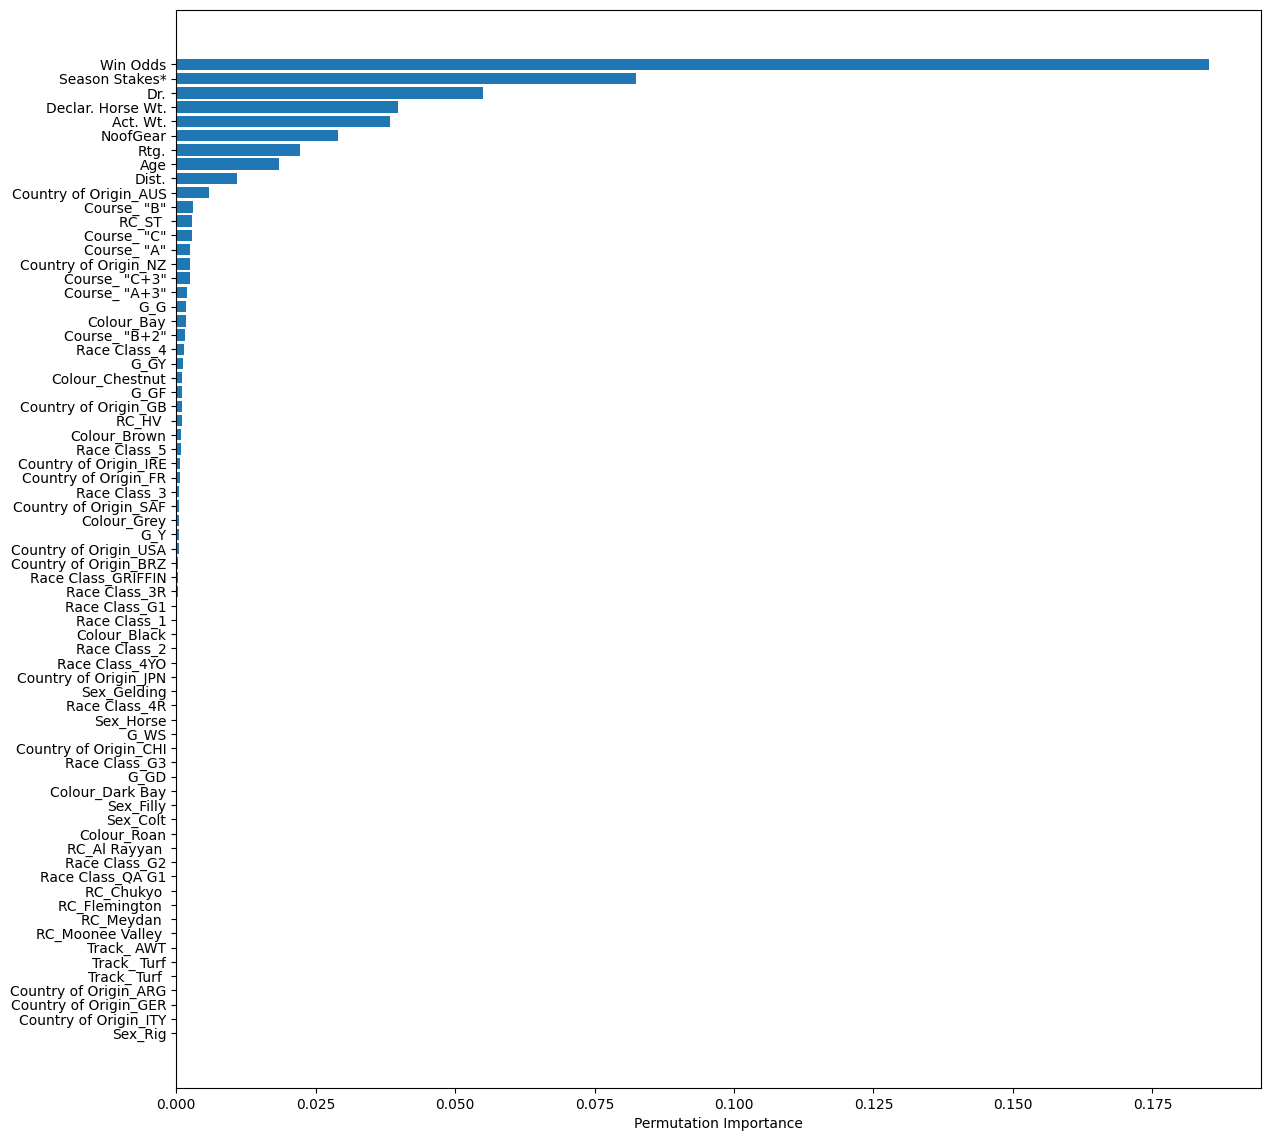

In [7]:
import matplotlib.pyplot as plt

# Show the importance
sorted_idx = perm.importances_mean.argsort()
plt.figure(figsize=(14,14))
plt.barh(range(x_train.shape[1]), perm.importances_mean[sorted_idx])
plt.yticks(range(x_train.shape[1]), np.array(feature)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [8]:
# Create a DataFrame to display the importance table
importance_table = pd.DataFrame({
    'features': np.array(feature)[sorted_idx],
    'importance': perm.importances_mean[sorted_idx]
})
print(importance_table)

                 features  importance
0                 Sex_Rig    0.000000
1   Country of Origin_ITY    0.000000
2   Country of Origin_GER    0.000000
3   Country of Origin_ARG    0.000000
4            Track_ Turf     0.000000
..                    ...         ...
64               Act. Wt.    0.038429
65      Declar. Horse Wt.    0.039812
66                    Dr.    0.054984
67         Season Stakes*    0.082466
68               Win Odds    0.185212

[69 rows x 2 columns]


In [9]:
#we select the features with importance > 0.01
selected=importance_table[importance_table['importance']>0.01]["features"]
selected

60                Dist.
61                  Age
62                 Rtg.
63             NoofGear
64             Act. Wt.
65    Declar. Horse Wt.
66                  Dr.
67       Season Stakes*
68             Win Odds
Name: features, dtype: object

In [10]:
df_train, df_test = train_test_split(fdf,test_size=0.2)

pos_train = df_train["Pla."]
x_train = df_train.iloc[:,6:].values
sx_train = df_train[selected].values
y3_train = df_train["top3"]
y1_train = df_train["top1"]

pos_test = df_test["Pla."]
x_test = df_test.iloc[:,6:].values
sx_test = df_test[selected].values
y3_test = df_test["top3"]
y1_test = df_test["top1"]

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf_clf.fit(sx_train, y3_train)
y3_pred=rf_clf.predict(sx_test)
print('Accuracy for top 3 with selectd features >0.01:', round(accuracy_score(y3_test, y3_pred), 4))

Accuracy for top 3 with selectd features >0.01: 0.7373


In [12]:
df_test['top3Winodd'] = np.where(df_test['top3'] == 1, df_test['Win Odds'], 0)

Outcome=pd.DataFrame({'position':df_test["Pla."],'y3_pred':y3_pred,'y3_test':y3_test,'top 3 Win Odds':df_test['top3Winodd'],})
Outcome['top 3 net'] = np.where(Outcome['y3_pred']==1,np.where(Outcome['y3_test']==1,(abs(Outcome['top 3 Win Odds']-1)*10),-10), 0)
#Outcome = Outcome.sort_values(by=[ 'position','top 3 Win Odds'], ascending=[True, False])
Outcome

,position,y3_pred,y3_test,top 3 Win Odds,top 3 net
736,1,0,1,11.0,0.0
103,3,1,1,3.9,29.0
4843,2,0,1,10.0,0.0
2559,13,0,0,0.0,0.0
2475,11,0,0,0.0,0.0
...,...,...,...,...,...
1484,11,0,0,0.0,0.0
10301,10,0,0,0.0,0.0
4181,7,0,0,0.0,0.0
12277,2,0,1,10.0,0.0


In [13]:
Outcome.sum()

position          16094.0
y3_pred             473.0
y3_test             767.0
top 3 Win Odds     8975.5
top 3 net          5806.0
dtype: float64

### 3. Model consider variable importance and interaction effect: classifer on 'top3'

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


selected_features=[]
accuracy=[]

df_train, df_test = train_test_split(fdf,test_size=0.2)
y_train = df_train["top3"]
y_test = df_test["top3"]
imp_ord = np.argsort(perm['importances_mean'])

for i in range (-1, -65, -1):
  print("Adding", feature[imp_ord][i])
  selected_features.append(feature[imp_ord][i])
  x_train=df_train[selected_features].values
  x_test=df_test[selected_features].values
  rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
  rf_clf.fit(x_train, y_train)
  accuracy.append(round(accuracy_score(y_test, rf_clf.predict(x_test)), 4))
  print('selected :',len(selected_features),'Accuracy : ', round(accuracy_score(y_test, rf_clf.predict(x_test)), 4))
  print("="*20)

Adding Win Odds
selected : 1 Accuracy :  0.7385
Adding Season Stakes*
selected : 2 Accuracy :  0.6832
Adding Dr.
selected : 3 Accuracy :  0.7074
Adding Declar. Horse Wt.
selected : 4 Accuracy :  0.7193
Adding Act. Wt.
selected : 5 Accuracy :  0.7327
Adding NoofGear
selected : 6 Accuracy :  0.7366
Adding Rtg.
selected : 7 Accuracy :  0.7335
Adding Age
selected : 8 Accuracy :  0.7346
Adding Dist.
selected : 9 Accuracy :  0.7358
Adding Country of Origin_AUS
selected : 10 Accuracy :  0.735
Adding Course_ "B"
selected : 11 Accuracy :  0.7362
Adding RC_ST 
selected : 12 Accuracy :  0.7358
Adding Course_ "C"
selected : 13 Accuracy :  0.7381
Adding Course_ "A"
selected : 14 Accuracy :  0.7373
Adding Country of Origin_NZ
selected : 15 Accuracy :  0.7354
Adding Course_ "C+3"
selected : 16 Accuracy :  0.7385
Adding Course_ "A+3"
selected : 17 Accuracy :  0.7381
Adding G_G
selected : 18 Accuracy :  0.7369
Adding Colour_Bay
selected : 19 Accuracy :  0.7366
Adding Course_ "B+2"
selected : 20 Accurac

In [15]:
list=[]
for i in range (1, 65):
  list.append(i)
Accuracy_table=pd.DataFrame({'number of features':list,'RF accuracy':accuracy})

<Axes: xlabel='number of features'>

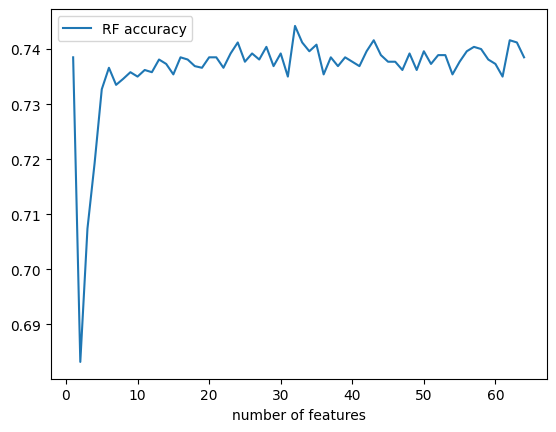

In [16]:
Accuracy_table.plot(x ='number of features', y='RF accuracy')

Hence, we selected the top 11 features for random forest model 

In [17]:
opt_feature=selected_features[0:11]
#opt_feature=['Win Odds','Season Stakes*','Dr.','Act.Wt.','Declar.Horse Wt.','Rtg.','NoofGear','Age','Dist.','Country of Origin_AUS ','Course_ "A"']

df_train, df_test = train_test_split(fdf,test_size=0.2)

pos_train = df_train["Pla."]
x_train = df_train.iloc[:,7:].values
sx_train = df_train[opt_feature].values
y3_train = df_train["top3"]
y1_train = df_train["top1"]

pos_test = df_test["Pla."]
x_test = df_test.iloc[:,7:].values
sx_test = df_test[opt_feature].values
y3_test = df_test["top3"]
y1_test = df_test["top1"]

feature=df_train.columns[7:].values

In [18]:
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf_clf.fit(sx_train, y3_train)
y3_pred=rf_clf.predict(sx_test)
print('Accuracy for top 3 with 11 selected features:', round(accuracy_score(y3_test, y3_pred), 4))

Accuracy for top 3 with 11 selected features: 0.7462


In [19]:
df_test['top3Winodd'] = np.where(df_test['top3'] == 1, df_test['Win Odds'], 0)
Outcome=pd.DataFrame({'position':df_test["Pla."],'y3_pred':y3_pred,'y3_test':y3_test,'top 3 Win Odds':df_test['top3Winodd']})
Outcome['top 3 net'] = np.where(Outcome['y3_pred']==1,np.where(Outcome['y3_test']==1,(abs(Outcome['top 3 Win Odds']-1)*10),-10), 0)
Outcome

,position,y3_pred,y3_test,top 3 Win Odds,top 3 net
10982,3,0,1,15.0,0.0
8546,4,0,0,0.0,0.0
5000,7,1,0,0.0,-10.0
3788,3,0,1,25.0,0.0
2875,12,0,0,0.0,0.0
...,...,...,...,...,...
6582,7,0,0,0.0,0.0
7923,13,0,0,0.0,0.0
7170,1,0,1,12.0,0.0
4307,4,1,0,0.0,-10.0


In [20]:
Outcome[(Outcome["y3_pred"]==1) & (Outcome["y3_test"]==1)]

,position,y3_pred,y3_test,top 3 Win Odds,top 3 net
273,2,1,1,2.5,15.0
893,1,1,1,1.4,4.0
11994,2,1,1,3.9,29.0
8935,1,1,1,2.6,16.0
10161,1,1,1,7.0,60.0
...,...,...,...,...,...
12751,2,1,1,14.0,130.0
7724,3,1,1,3.4,24.0
8051,1,1,1,2.1,11.0
7738,1,1,1,4.0,30.0


In [21]:
Outcome[(Outcome["y3_pred"]==0) & (Outcome["y3_test"]==0)]

,position,y3_pred,y3_test,top 3 Win Odds,top 3 net
8546,4,0,0,0.0,0.0
2875,12,0,0,0.0,0.0
1678,12,0,0,0.0,0.0
5525,9,0,0,0.0,0.0
2161,5,0,0,0.0,0.0
...,...,...,...,...,...
12060,11,0,0,0.0,0.0
10771,9,0,0,0.0,0.0
6582,7,0,0,0.0,0.0
7923,13,0,0,0.0,0.0


In [22]:
Outcome.sum()

position          16369.0
y3_pred             456.0
y3_test             745.0
top 3 Win Odds     9193.1
top 3 net          6654.0
dtype: float64

In [23]:
selected=selected_features[0:13]
df_train, df_test = train_test_split(fdf,test_size=0.2)

pos_train = df_train["Pla."]
sx_train = df_train[selected].values
y_train = df_train["top3"]

pos_test = df_test["Pla."]
sx_test = df_test[selected].values
y_test = df_test["top3"]

### 4. Model Consider hyperparameter tuning on 'top3'

In [24]:
print('Parameters currently in use:\n')
print(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [25]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [26]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=1)

model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

clf = GridSearchCV(rf_model, model_params, cv=5)

model = clf.fit(sx_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [27]:
print('Selected 11 features accuracy:', round(accuracy_score(y3_test, model.predict(sx_test)),4))

Selected 11 features accuracy: 0.6402


In [34]:
print("Length of y_pred:", len(model.predict(sx_test)))
print("Length of y_test:", len(y_test))
print("Length of Win Odds:", len(df_test['Win Odds']))
print("Length of position:", len(df_test["Pla."]))
print("Length of sx_test:", len(sx_test))
print("Length of y_train:", len(y_train))
print("Length of sx_train:", len(sx_train))
print("Length of pos_train:", len(pos_train))
print("Length of y3_test:", len(y3_test))
print("Win Odds:", len(df_test['top3Winodd']))



Length of y_pred: 2604
Length of y_test: 2604
Length of Win Odds: 2604
Length of position: 2604
Length of sx_test: 2604
Length of y_train: 10414
Length of sx_train: 10414
Length of pos_train: 10414
Length of y3_test: 2604
Win Odds: 2604


In [38]:
# Ensure all inputs are reset or aligned to avoid index mismatches
y_pred = model.predict(sx_test)
y_test_reset = y3_test.reset_index(drop=True)
win_odds_reset = df_test['Win Odds'].reset_index(drop=True)
position_reset = df_test["Pla."].reset_index(drop=True)

# Now create the DataFrame with the reset series
Outcome = pd.DataFrame({
    'y_pred': y_pred,
    'y_test': y_test_reset,
    'Win Odds': win_odds_reset,
    'position': position_reset
})

Outcome['net'] = np.where(Outcome['y_pred']==1, np.where(Outcome['y_test']==1, (abs(Outcome['Win Odds']-1)*10), -10), 0)
print(Outcome)
print(Outcome.sum())


      y_pred  y_test  Win Odds  position   net
0          0       1      18.0         6   0.0
1          0       0      43.0         7   0.0
2          0       0      26.0         6   0.0
3          0       1       3.3         2   0.0
4          0       0      62.0        11   0.0
...      ...     ...       ...       ...   ...
2599       1       0       5.9         3 -10.0
2600       0       0       4.2         4   0.0
2601       0       1       6.5         7   0.0
2602       0       0      69.0        11   0.0
2603       1       0       2.0         1 -10.0

[2604 rows x 5 columns]
y_pred        426.0
y_test        745.0
Win Odds    71251.1
position    16087.0
net           666.0
dtype: float64


In [39]:
df_test['top3Winodd'] = np.where(df_test['top3'] == 1, df_test['Win Odds'], 0)
Outcome=pd.DataFrame({'y_pred':model.predict(sx_test),'y_test':y3_test,'Win Odds':df_test['Win Odds'],'position':df_test["Pla."]})
Outcome['net'] = np.where(Outcome['y_pred']==1,np.where(Outcome['y_test']==1,(abs(Outcome['Win Odds']-1)*10),-10), 0)
print(Outcome)
print(Outcome.sum())

ValueError: array length 2604 does not match index length 4707

When the y_pred =1, we will pay 10HKD for betting, if y_test =1, that means our prediction is correct, the horse is in the top3 places, we will get 'Win Odds'*10, which mean we will have (winodd-1)*10 return.
if we pay 10HKD and the horse does not win, we lose 10HKD so the 'net'column = -10
If the y_pred =0, our model predict the horse can not win in the 'place' betting system and hence we will not bet on it. The corresponding 'net' column will be 0

### Model consider variable importance: classifer on 'top1'



In [ ]:
#pip install eli5import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf_clf.fit(x_train, y1_train)
perm = PermutationImportance(rf_clf).fit(x_train, y1_train)
eli5.show_weights(perm, feature_names=feature)

In [ ]:
# importance in decreasing order
imp_ord = np.argsort(perm.feature_importances_)

plt.figure(figsize=(14,14))
yaxis = np.arange(len(perm.feature_importances_))*1
plt.barh(y = yaxis,width = perm.feature_importances_[imp_ord])
plt.yticks(yaxis,feature[imp_ord])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

In [ ]:
top1_importance_table=pd.DataFrame({'features':feature[imp_ord],'importance':perm.feature_importances_[imp_ord]})
print(top1_importance_table.to_string())

In [ ]:
#we select the features with importance > 0.01
selected=["NoofGear", "Dist.","Age","Rtg.", "Act.Wt.","Declar.Horse Wt.","Dr.", "Season Stakes*", "Win Odds"]
#selected=importance_table[importance_table['importance']>0.01]["features"]
sx_train = df_train[selected].values
sx_test = df_test[selected].values

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf_clf.fit(sx_train, y1_train)
y1_pred=rf_clf.predict(sx_test)
print('Accuracy:', accuracy_score(y1_test, y1_pred).round(4))

In [ ]:
Outcome=pd.DataFrame({'y_pred':y1_pred,'y1_test':y1_test,'Win Odds':df_test['Win Odds'],'position':df_test["Pla."]})
Outcome['net'] = np.where(Outcome['y_pred']==1,np.where(Outcome['y1_test']==1,(Outcome['Win Odds']-1)*10,-10), 0)
Outcome

In [ ]:
Outcome.sum()

### Model consider variable importance and interaction effect: classifer on 'top1'

In [ ]:
selected_features=[]
accuracy=[]

df_train, df_test = train_test_split(fdf,test_size=0.2)
y_train = df_train["top1"]
y_test = df_test["top1"]

for i in range (-1, -65, -1):
  print("Adding", feature[imp_ord][i])
  selected_features.append(feature[imp_ord][i])
  x_train=df_train[selected_features].values
  x_test=df_test[selected_features].values
  rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
  rf_clf.fit(x_train, y_train)
  accuracy.append(accuracy_score(y_test, rf_clf.predict(x_test)).round(4))
  print('selected :',len(selected_features),'Accuracy : ', accuracy_score(y_test, rf_clf.predict(x_test)).round(4))
  print("="*20)

In [ ]:
list=[]
for i in range (1, 65):
  list.append(i)
Accuracy_table=pd.DataFrame({'number of features':list,'RF accuracy':accuracy})
Accuracy_table.plot(x ='number of features', y='RF accuracy')

In [ ]:
opt_feature=selected_features[0:14]
opt_feature

The maximum accuracy is attained when 14 variables are included. The accuracy  = 0.9091

In [ ]:
# calculate the award based on the existing model

opt_selected=['Win Odds','Season Stakes*','Dr.','Act.Wt.','Declar.Horse Wt.','Rtg.','NoofGear',
 'Age','Dist.','Country of Origin_NZ ','Country of Origin_AUS ','Course_ "B"','Course_ "C"','Course_ "A"']

df_train, df_test = train_test_split(fdf,test_size=0.2)

pos_train = df_train["Pla."]
sx_train = df_train[opt_selected].values
y1_train = df_train["top1"]

pos_test = df_test["Pla."]
sx_test = df_test[opt_selected].values
y1_test = df_test["top1"]

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf_clf.fit(sx_train, y1_train)
y1_pred=rf_clf.predict(sx_test)
print('Accuracy:', accuracy_score(y1_test, y1_pred).round(4))

In [ ]:
Outcome=pd.DataFrame({'y_pred':y1_pred,'y1_test':y1_test,'Win Odds':df_test['Win Odds'],'position':df_test["Pla."]})
Outcome['net'] = np.where(Outcome['y_pred']==1,np.where(Outcome['y1_test']==1,(Outcome['Win Odds']-1)*10,-10), 0)
Outcome

In [ ]:
Outcome.sum()

### Model consider hyperparameter tuning on 'top1'

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=1)

model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

clf = GridSearchCV(rf_model, model_params, cv=5)

model = clf.fit(sx_train, y1_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

In [ ]:
print('Selected 14 features accuracy:', accuracy_score(y1_test, model.predict(sx_test)).round(4))

In [ ]:
Outcome=pd.DataFrame({'y_pred':model.predict(sx_test),'y_test':y1_test,'Win Odds':df_test['Win Odds'],'position':df_test["Pla."]})
Outcome['net'] = np.where(Outcome['y_pred']==1,np.where(Outcome['y_test']==1,(abs(Outcome['Win Odds']-1)*10),-10), 0)
print(Outcome)
print(Outcome.sum())

## Neural Network (Approach: Place)

### Hyperparameter tuning

In [ ]:
# Load the dataset
from sklearn.neural_network import MLPClassifier
full_data = pd.read_csv("drive/MyDrive/COMP3359 Project/full_data_update.csv")

# split the features and expected result
y_df = full_data[["top3"]]
y_df["class"] = y_df["top3"]
x_df = full_data.drop(["horse", "N_RaceIndex", "Pla.", "Finish Time", "top3", "top1"], axis = 1)
y_df.drop(["top3"], axis=1, inplace=True)

# split the train set and test set
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size = 0.2)
train_outcome = train_x[["top3Winodd"]]
test_outcome = test_x[["top3Winodd"]]
train_x.drop(["top3Winodd"], axis=1, inplace=True)
test_x.drop(["top3Winodd"], axis=1, inplace=True)

In [ ]:
# Hyperparameter tuning (Do not run this cell)
scores = []
for i in range(1, 5):
    model = MLPClassifier(hidden_layer_sizes=i*100, batch_size=36).fit(train_x, train_y)
    scores.append(model.score(test_x, test_y))

In [ ]:
# Hyperparameter tuning (Do not run this cell)
import matplotlib.pyplot as plt
plt.plot([100, 200, 300, 400], scores)
plt.ylabel("scores")
plt.xlabel("hidden layer size")
plt.show()

In [ ]:
# Hyperparameter tuning (Do not run this cell)
scores = []
for i in [0.0001, 0.001, 0.01, 0.1]:
    model = MLPClassifier(hidden_layer_sizes=100, learning_rate_init=i, batch_size=36).fit(train_x, train_y)
    scores.append([model.score(train_x, train_y), model.score(test_x, test_y)])

import matplotlib.pyplot as plt
plt.plot([0.0001, 0.001, 0.01, 0.1], scores)
plt.ylabel("scores")
plt.annotate
plt.show()

In [ ]:
# Hyperparameter tuning (Do not run this cell)
from sklearn.model_selection import GridSearchCV

selected=['Win Odds','Season Stakes*','Dr.','Declar.Horse Wt.','Act.Wt.','Rtg.','Age','NoofGear','Dist.','Country of Origin_AUS ','Country of Origin_NZ ','Country of Origin_IRE ']
train_x_2 = train_x[selected]
test_x_2 = test_x[selected]

parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

model = MLPClassifier(hidden_layer_sizes=200, solver="sgd", activation="tanh", alpha=0.0001, max_iter=1)

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(train_x_2, train_y)
print(clf.best_params_)

In [ ]:
# NN Model Result (Predicting Place (Top 3))
# Do not run this cell
model = MLPClassifier(hidden_layer_sizes=100, solver="sgd", activation="tanh", alpha=0.0001, early_stopping=True).fit(train_x, train_y)
predict = model.predict(test_x)
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

In [ ]:
# NN Model Result (Predicting Place (Top 1))
# Do not run this cell
predict = model.predict_proba(test_x)
temp = pd.DataFrame(predict, columns=["0", "1"])

print(model.score(test_x, test_y))
temp.describe()

### Model

In [ ]:
# Select the important features only
selected=['Win Odds','Season Stakes*','Dr.','Declar.Horse Wt.','Act.Wt.','Rtg.','Age','NoofGear','Dist.','Country of Origin_AUS ','Country of Origin_NZ ','Country of Origin_IRE ']
train_x_2 = train_x[selected]
test_x_2 = test_x[selected]

In [ ]:
# NN Model (Predicting Place(Top 3))
model = MLPClassifier(hidden_layer_sizes=100, solver="sgd", activation="tanh", alpha=0.0001, early_stopping=True).fit(train_x_2, train_y)
predict = model.predict(test_x_2)
print("Example result: Class " + str(predict[0]))
print("Real value : Class " + str(test_y.iloc[0]["class"]))
print(model.score(train_x_2, train_y))
print(model.score(test_x_2, test_y))

In [ ]:
# Build a new DataFrame to count net gain/loss 
outcome = pd.DataFrame({'pred':predict,'Real':test_y["class"],'Win Odds':test_outcome["top3Winodd"]})
outcome

In [ ]:
# Count the net gain/loss
outcome["Win Odds"].fillna(0.0, inplace=True)
outcome['net'] = np.where(outcome['pred']==1, np.where(outcome['Real']==1, abs((outcome["Win Odds"] - 1)*10), -10), 0)
outcome

In [ ]:
outcome["net"].sum()

In [ ]:
sum(outcome["pred"]==1)
# In this cell, we found that the model is not learning

## Neural Network (Approach: Time)

### Prepare Data

In [ ]:
# Selecting the features for predicting finish time
import random

# read the data set
data_df = pd.read_csv("drive/MyDrive/COMP3359 Project/full_data_update.csv")

# Normalize Dist. and season stakes
data_df["Season Stakes*"] = data_df["Season Stakes*"] / 100000
data_df["Dist."] = (data_df["Dist."] - 1000) / 1400

# Drop the uneless columns and columns which may interfer the model
data_df.drop(["Pla.", "horse", "N_RaceIndex", "top3", "top1", "top3Winodd"], axis=1, inplace=True)
for col in data_df.select_dtypes(include=['object']).columns:
    data_df[col] = data_df[col].astype('category')
for col in data_df.select_dtypes(include=['category']).columns:
    data_df[col] = data_df[col].cat.codes

RAND_SEED = 3359
TRAIN_SIZE = 0.8

all_index = list(range(len(data_df)))

random.seed(RAND_SEED)
random.shuffle(all_index)

train_size = int(len(data_df) * TRAIN_SIZE)
train_idx = all_index[:train_size]
test_idx = all_index[train_size:]

# Split the train and test set
x_data_df, y_data_df = data_df.drop(["Finish Time"], axis=1), data_df["Finish Time"]
train_x, test_x = x_data_df.iloc[train_idx], x_data_df.iloc[test_idx]
train_y, test_y = y_data_df.iloc[train_idx], y_data_df.iloc[test_idx]

train_x = train_x.reset_index()
test_x = test_x.reset_index()
train_y = train_y.reset_index()
test_y = test_y.reset_index()

train_y.drop(["index"], axis=1, inplace=True)
test_y.drop(["index"], axis=1, inplace=True)
train_x.drop(["index"], axis=1, inplace=True)
test_x.drop(["index"], axis=1, inplace=True)

# select the important features 
selected=['Win Odds','Season Stakes*','Dr.','Declar.Horse Wt.','Act.Wt.','Rtg.','Age','NoofGear','Dist.','Country of Origin_AUS ','Country of Origin_NZ ','Country of Origin_IRE ']
train_x_2 = train_x[selected]
test_x_2 = test_x[selected]

In [ ]:
test_x

### Experiment & Parameters Tuning

In [ ]:
# Import the libs for this section
from sklearn.neural_network import MLPRegressor

In [ ]:
# Experiment(Don't Run this cell)
scores = []
index = []
for i in range(1, 20):
    model = MLPRegressor(hidden_layer_sizes=i*100, random_state=RAND_SEED, batch_size="auto").fit(train_x_2, train_y)
    scores.append([model.score(train_x_2, train_y), model.score(test_x_2, test_y)])
    index.append(i*100)

import matplotlib.pyplot as plt
plt.plot(index, scores)
plt.ylabel("scores")
plt.xlabel("hidden_layer_size")
plt.show()

In [ ]:
# Experiment(Don't Run this cell)
scores = []
index = []
for i in range(1, 10):
    model = MLPRegressor(hidden_layer_sizes=1250, random_state=RAND_SEED, batch_size="auto", momentum=i*0.1).fit(train_x_2, train_y)
    scores.append([model.score(train_x_2, train_y), model.score(test_x_2, test_y)])
    index.append(i*0.1)

import matplotlib.pyplot as plt
plt.plot(index, scores)
plt.ylabel("scores")
plt.xlabel("Momentum")
plt.show()

In [ ]:
# Hyperparameters tuning (Don't Run this cell)
from sklearn.model_selection import GridSearchCV

parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

model = MLPRegressor(hidden_layer_sizes=1200)
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(train_x_2, train_y)
print(clf.best_params_)

In [ ]:
# NN Model (Predicting Time)
model = MLPRegressor(hidden_layer_sizes=1250, batch_size="auto", solver="adam", alpha=0.0001).fit(train_x_2, train_y)
print(model.score(train_x_2, train_y))
print(model.score(test_x_2, test_y))

From the table above, we can see that over 70% of the dataset are actually 